In [13]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt


In [2]:
hls_path = r'C:\Users\attic\HLS_Kelp\imagery\Isla_Vista_Kelp\HLS.L30.T10SGD.2017167T183413.v2.0\HLS.L30.T10SGD.2017167T183413.v2.0.B01.tif'

dem_path = r'C:\Users\\attic\HLS_Kelp\imagery\Isla_Vista_Kelp\dem.tif'

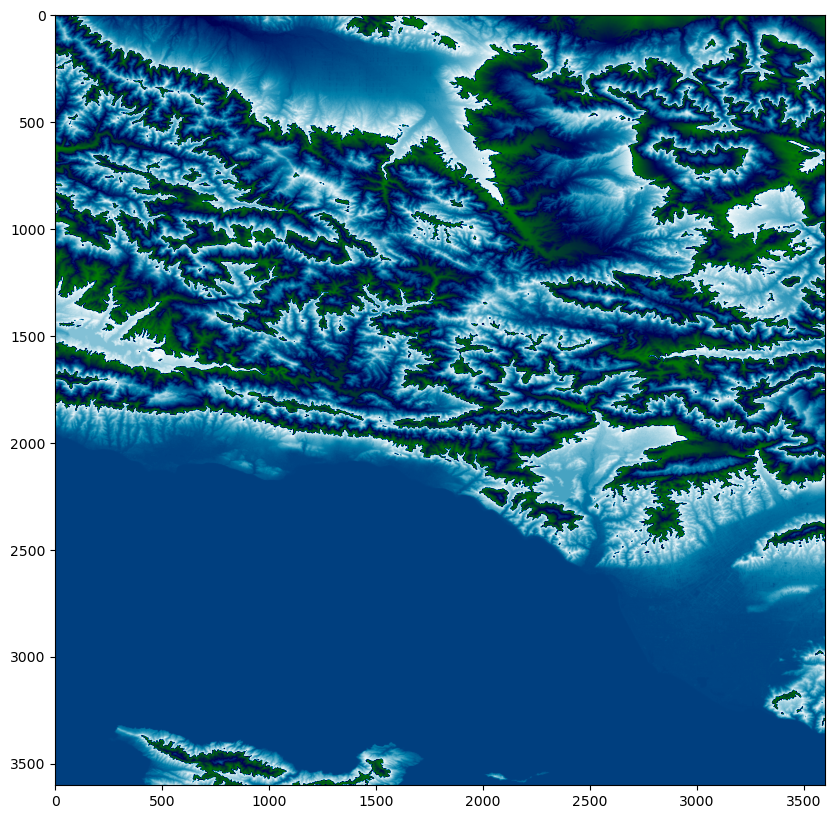

In [11]:
with rasterio.open(hls_path) as src:
    landsat_data = src.read()
    landsat_crs = src.crs
    landsat_transform = src.transform
with rasterio.open(dem_path) as src_dem:
    dem_data = src_dem.read()
    dem_crs = src_dem.crs
    dem_transform = src_dem.transform



plt.figure(figsize=(10, 10))
plt.imshow(dem*100, cmap='ocean')
plt.show()

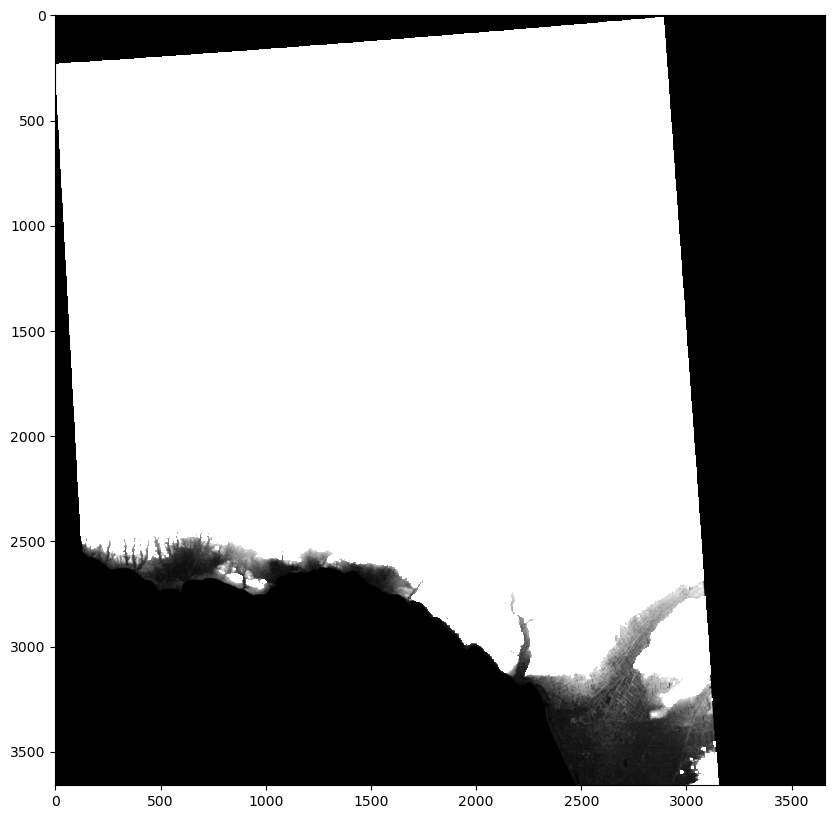

In [15]:

    # Reproject DEM to match Landsat CRS if necessary
    if not landsat_crs == dem_crs:
        transform, width, height = calculate_default_transform(src_dem.crs, landsat_crs, src_dem.width, src_dem.height, *src_dem.bounds)
        kwargs = src_dem.meta.copy()
        kwargs.update({
            'crs': landsat_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        # Create an in-memory array for reprojected DEM
        reprojected_dem_data = np.zeros((landsat_data.shape[1], landsat_data.shape[2]), dtype=dem_data.dtype)

        reproject(
            source=dem_data,
            destination=reprojected_dem_data,
            src_transform=dem_transform,
            src_crs=dem_crs,
            dst_transform=transform,
            dst_crs=landsat_crs,
            resampling=Resampling.nearest)

        # Assign reprojected data back to dem_data
        dem_data = reprojected_dem_data

    # Masking based on elevation threshold
    elevation_threshold = 100  # Example threshold in meters

    # Mask areas above threshold
    dem_data = np.where(dem_data > elevation_threshold, np.nan, dem_data)

    plt.figure(figsize=(10, 10))
    plt.imshow(dem_data*1000, cmap='gray')
    plt.show()

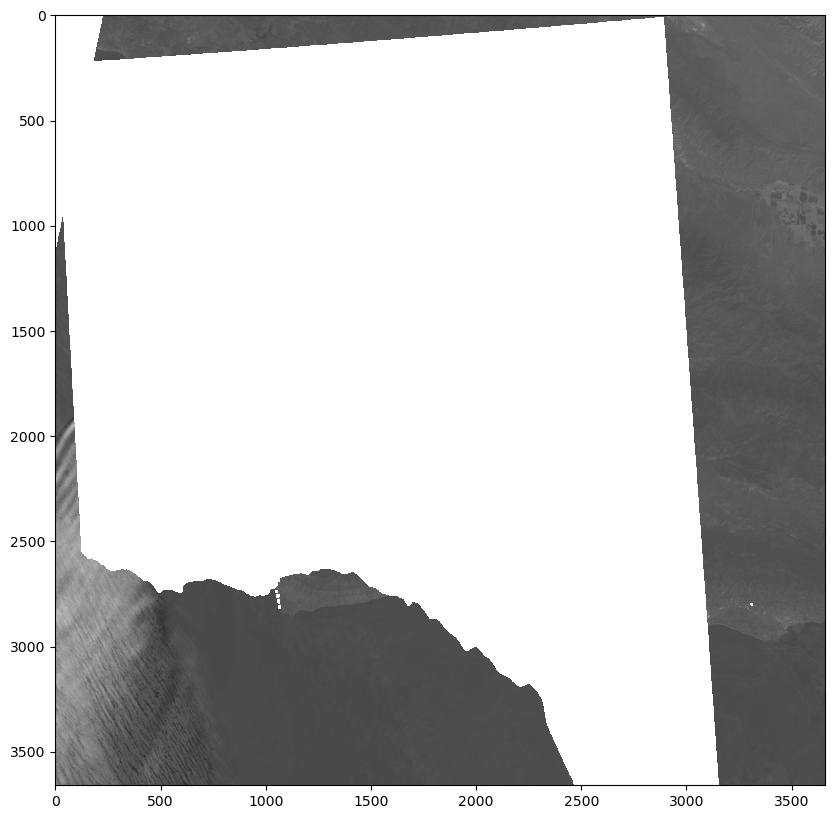

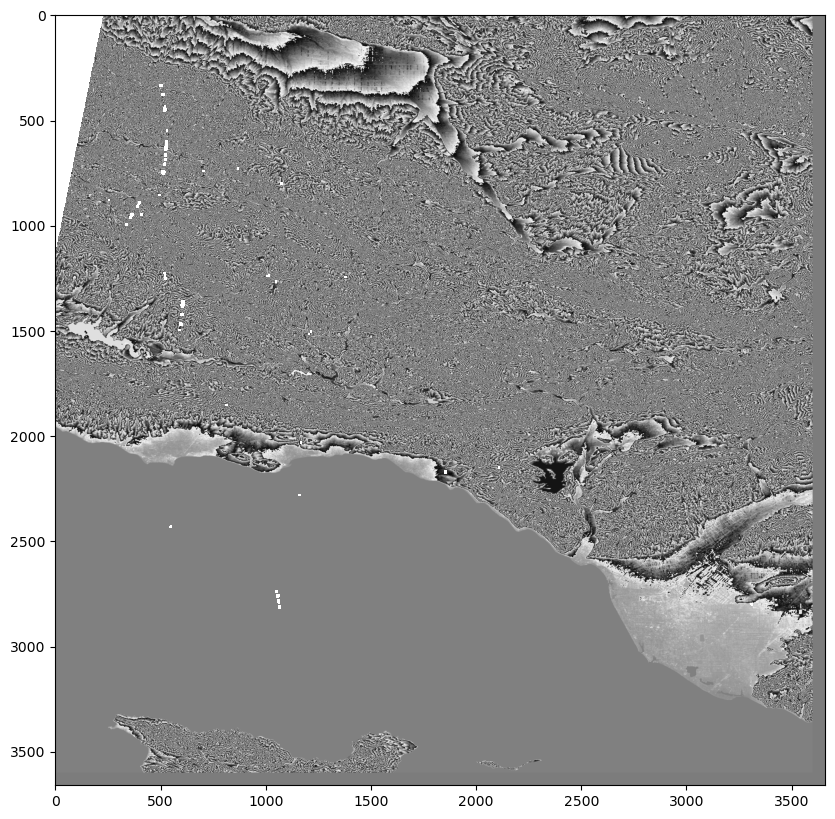

In [16]:
landsat_masked = np.ma.masked_where(dem_data, landsat_band)
plt.figure(figsize=(10, 10))
plt.imshow(landsat_masked, cmap='gray')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(dem_reprojected*1000, cmap='gray')
plt.show()

In [9]:
with rasterio.open(hls_path) as src:
    # Reproject DEM to match Landsat CRS, shape, and resolution
    
    dem_reprojected = np.zeros_like(landsat_band)
    reproject(
        source=dem,
        destination=dem_reprojected,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=landsat_profile['transform'],
        dst_crs=landsat_profile['crs'],
        resampling=Resampling.nearest 
    )

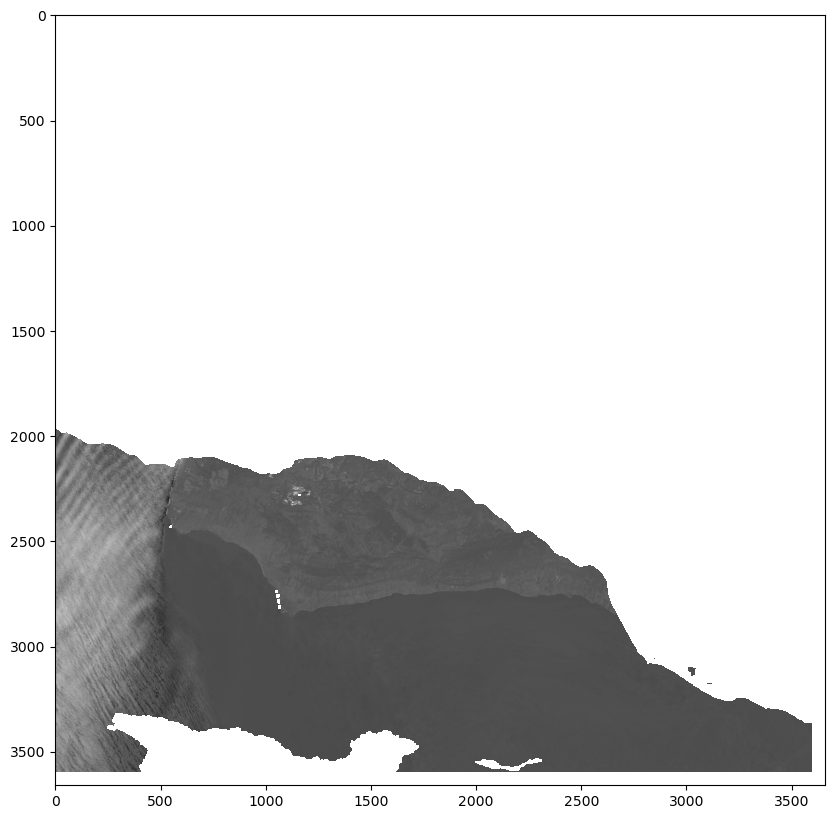

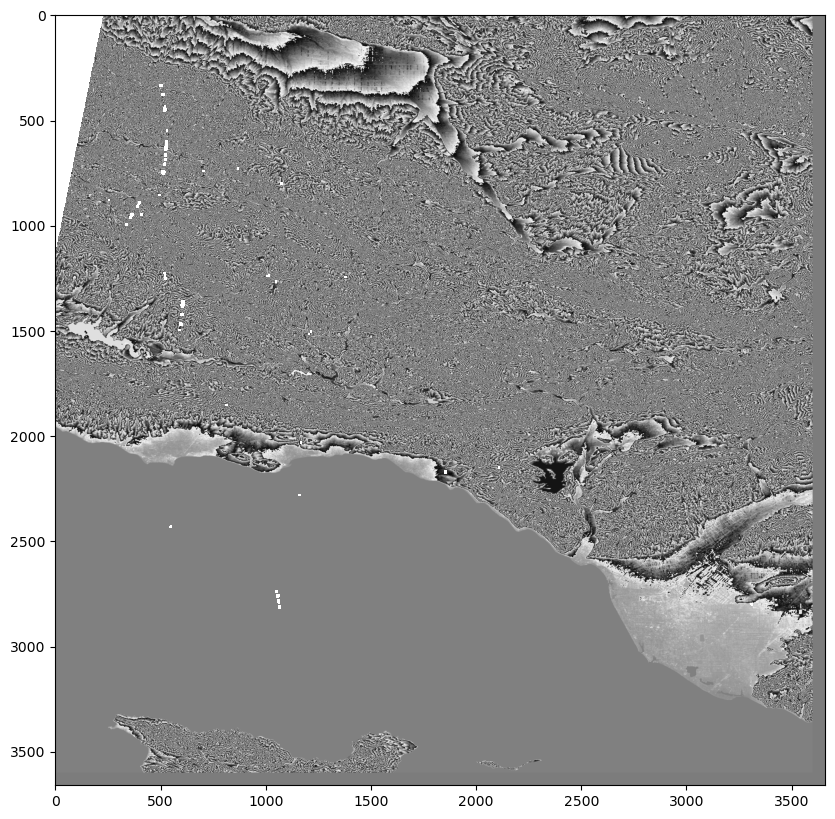

In [10]:

landsat_masked = np.ma.masked_where(dem_reprojected > 0, landsat_band)
plt.figure(figsize=(10, 10))
plt.imshow(landsat_masked, cmap='gray')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(dem_reprojected*1000, cmap='gray')
plt.show()